### tweets emotion prediction
homework in DMLab2

## 1.1 Load data
explore the raw data (.json) in explore_json.ipynb in file under Homework
transform it to dataframe

In [1]:
import json
import pandas as pd

# 存儲提取數據的列表
tweets_data = []

# 讀取 JSON 文件
with open('dm-2024-isa-5810-lab-2-homework/tweets_DM.json', 'r') as file:
    for line in file:
        try:
            # 解析 JSON 每行
            tweet = json.loads(line)
            # 提取所需的欄位
            tweet_id = tweet["_source"]["tweet"].get("tweet_id")
            text = tweet["_source"]["tweet"].get("text")
            #hashtags = tweet["_source"]["tweet"].get("hashtags", [])
            #crawldate = tweet.get("_crawldate")

            # 將提取的欄位存入字典，並添加到列表中
            tweets_data.append({
                "tweet_id": tweet_id,
                "text": text,
                #"hashtags": hashtags,
                #"crawldate": crawldate
            })
        except json.JSONDecodeError as e:
            print("JSON decode error:", e)

# 將提取的數據轉換為 DataFrame
df = pd.DataFrame(tweets_data)

# 查看數據框內容
#print(df)

using files provided on Kaggle to classify the training and testing data  
  
### interpret for the data  
描述訓練資料集的特徵  
describe features in training data

In [2]:
classify = pd.read_csv('dm-2024-isa-5810-lab-2-homework/data_identification.csv')  # 包含 tweet_id 和 identification
emotion = pd.read_csv('dm-2024-isa-5810-lab-2-homework/emotion.csv')  # 包含 tweet_id 和 emotion
data = pd.merge(df, classify, on='tweet_id', how='inner')
data = pd.merge(data, emotion, on='tweet_id', how='outer')
data # 將情緒特徵及資料分類欄位加入相同dataframe

,tweet_id,text,identification,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
4,0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
...,...,...,...,...
1867530,0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
1867531,0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN
1867532,0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test,NaN
1867533,0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


In [3]:
# 將 data_identification 中 identification 欄位值為 'train' 的選出來作為訓練集
train_data = data[data['identification'] == 'train']

# 將 identification 欄位值為 'test' 的選出來作為測試集
test_data = data[data['identification'] == 'test']

# 所有情感emotion in emotion.csv
emotions = data['emotion'].unique()

# 使用字典來存儲不同情感的訓練集
train_data_by_emotion = {emotion: train_data[train_data['emotion'] == emotion] for emotion in emotions}

# 使用字典管理子 DataFrame
sub_dfs = {emotion: train_data_by_emotion[emotion] for emotion in emotions}
sub_dfs['anger'] # example for extract specific emotion

,tweet_id,text,identification,emotion
12,0x1fde89,Can someone tell my why my feeds scroll back t...,train,anger
14,0x269112,My brother didn't tell me he was going to horr...,train,anger
28,0x2452c9,Millions of purple cushion-footed balderdash !...,train,anger
40,0x2ac7bd,Hangry and ready to snap. #hangry <LH> #needfo...,train,anger
59,0x2d29d1,<LH> that’s how we women are. So we are tweeti...,train,anger
...,...,...,...,...
1867353,0x234c16,@deadskulltweets I'm mad you didn't win! You s...,train,anger
1867437,0x1de250,Billions of miserable blistering anthropithecc...,train,anger
1867465,0x269ca3,@ndtv Well this is new! terrorists are killing...,train,anger
1867468,0x2a796c,Omg. Don’t wait til chapter 47 to introduce a ...,train,anger


使用時用 print(sub_dfs['anger'].head())直接從datareame中提取

In [4]:
# shuffle dataset
train_data = train_data.sample(frac=0.5)
test_data = test_data.sample(frac=0.5)

---
### 1.2 Save data  
儲存資料，用比較不佔空間且容易在跨平台使用的格式  
save data in smaller size

In [5]:
import pandas as pd

## save to pickle file
train_data.to_pickle("train_data.pkl") 
test_data.to_pickle("test_data.pkl")

## load a pickle file
train_data = pd.read_pickle("train_data.pkl")
test_data = pd.read_pickle("test_data.pkl")

---
### 1.3 Exploratory data analysis (EDA)

繪製出所有訓練資料集的情感分布（百分比）

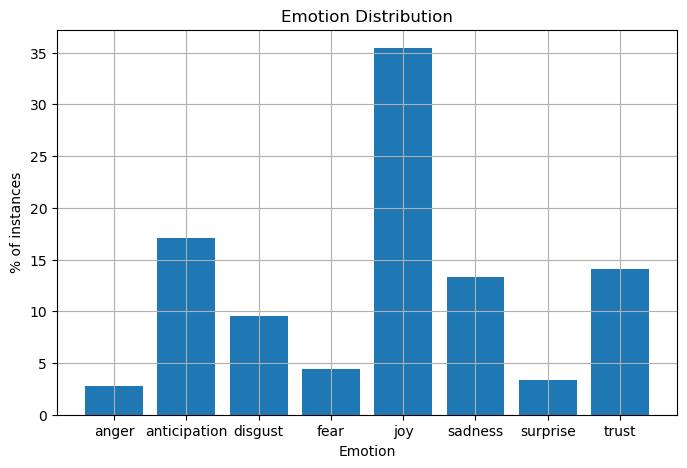

In [6]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# `emotions` 是包含所有情感類別的列表，在先前已有定義； `train_data` 包含所有訓練數據
labels = emotions
post_total = len(train_data)

# 計算每個情感的頻率 frequency
d_bar = train_data.groupby(['emotion']).count()['text'] / post_total * 100  # 計算每個情感的佔比（百分比）

# 繪製直方圖
fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(d_bar.index, d_bar.values)  # 使用 d_bar 進行繪製

# 設置圖表標題和標籤
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion Distribution')
plt.grid(True)
plt.show()

可以觀察到在所有訓練集中，分佈最多的是joy（愉悅、快樂）。 此百分比代表了被發布的推文中，隨著貼文帶著的情緒。  
  
接著開始分析文本，將文字轉換成向量

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  

tokenizer

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [9]:
import nltk
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 


# apply analyzer to training data
BOW_500.fit(train_data['text'])

train_data_BOW_features_500 = BOW_500.transform(train_data['text'])

## check dimension
train_data_BOW_features_500.shape

## adjust its type for visualize
train_data_BOW_features_500.toarray()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
"😂" in feature_names_500

True

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  

In [11]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_data['text'])
y_train = train_data['emotion']

X_test = BOW_500.transform(test_data['text'])
y_test = test_data['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (727782, 500)
y_train.shape:  (727782,)
X_test.shape:  (205986, 500)
y_test.shape:  (205986,)


In [18]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

from sklearn.metrics import accuracy_score

# 計算訓練和測試集的準確度
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)

# 輸出準確度，將結果四捨五入保留兩位小數
print('training accuracy: {}'.format(round(acc_train, 2)))

training accuracy: 0.93


### 3.1-1 Naive Bays

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: 特徵提取 (BOW)
vectorizer = CountVectorizer(max_features=500)  # 設置最大特徵數為 500
X_train = vectorizer.fit_transform(train_data["text"])
X_test = vectorizer.transform(test_data["text"])
y_train = train_data["emotion"]
y_test = test_data["emotion"]

# Step 2: 建立和訓練 Naive Bayes 模型
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Step 3: 模型預測
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

---
## 4. Results Evaluation

In [14]:
from sklearn.metrics import accuracy_score

# 計算訓練和測試集的準確度
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)

# 輸出準確度，將結果四捨五入保留兩位小數
print('training accuracy: {}'.format(round(acc_train, 2)))

training accuracy: 0.43


在此競賽中，只有提供training data，我們需要提交的是對test data的預測

In [17]:
# 使用上面訓練的模型來預測test的情緒，測試決策樹還有Naive Bays不同訓練方式出來的模型
y_submission_pred = DT_model.predict(X_submission)

NameError: name 'X_submission' is not defined